### ELASTICNET REGRESSION
This is used when large number of parameters are there (sometimes millions) and there are chances of
more useless data to make any prediction. ElasticNET regression is combination of Ridge and Lasso
regressions.
The penalty is calculated as:
λ x | slope| + λ x slope2
Note: the lasso regression penalty and ridge regression penalty get their own λs. They may not be
similar. So, the equation will be:
equation of line + the sum of squared residuals + λ1 x | slope| + λ2 x slope2
Here, λ1 indicates penalty for Lasso and λ2 indicates penalty for Ridge.
Note: When λ1 and λ2 are greater than 0, it will become ElasticNET regression.
Note: When creating object to ElasticNet class, l1_ratio indicates mixing parameter and its value is
between 0 and 1. When l1_ratio is 0, it indicates L2 penalty. When it is 1, it indicates L1 penalty. When
its value is between 0 and 1, then the penalty is combination of L1 and L2.
Ex:
es = ElasticNet(l1_ratio=0.5)
Elastic Net regression internally uses a loop and uses all features in predicting the outcome. Hence it
gives more accuracy. But Ridge regression uses only one feature.
It is also used in feature selection.

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv("Desktop/boston_houses.csv")
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# delete the Price column as it is dependent and take it as y
x = df.drop('MEDV', axis=1)
x


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
5,5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [5]:
y = df['MEDV'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
names = x.columns
names

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [7]:
# range of columns
rng = range(len(names))
rng

range(0, 14)

In [8]:
# draw line plot between range and coefficients in elastic net formula
from sklearn.linear_model import ElasticNet
es = ElasticNet(l1_ratio=0.5)
es_coef = es.fit(x,y).coef_
es_coef

array([-6.33436435e-04, -8.05732313e-02,  5.36135700e-02, -1.24769372e-02,
        0.00000000e+00, -0.00000000e+00,  9.36421179e-01,  2.00480544e-02,
       -7.66002463e-01,  3.06560176e-01, -1.62531442e-02, -7.47975720e-01,
        8.34471957e-03, -7.59067723e-01])

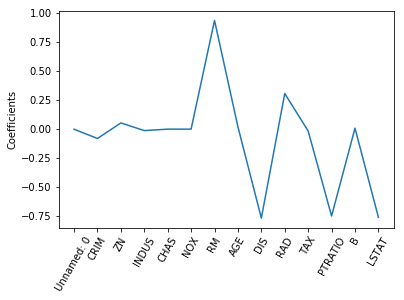

In [10]:
import matplotlib.pyplot as plt
plt.plot(rng, es_coef)
plt.xticks(rng, names, rotation=60)
plt.ylabel("Coefficients")
plt.show()